In [32]:
import random
import numpy as np
import numpy.linalg
from scipy.sparse import coo_matrix
import networkx as nx
import matplotlib.pyplot as plt

# sparse instructions: https://machinelearningmastery.com/sparse-matrices-for-machine-learning/

In [9]:
with open('coauthorship/astro-ph.txt', 'r') as f:
    raw_edges = f.readlines()

In [10]:
edges = np.array([list(map(int, edge.strip().split(' '))) for edge in raw_edges])


In [11]:
len(edges)

121251

In [13]:
total_nodes = 16706
dense_matrix = np.zeros(shape=(total_nodes, total_nodes))


In [14]:
for edge in edges:
    dense_matrix[edge[0]][edge[1]] = 1
dense_matrix

array([[0., 1., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       ...,
       [0., 0., 0., ..., 0., 1., 1.],
       [0., 0., 0., ..., 0., 0., 1.],
       [0., 0., 0., ..., 0., 0., 0.]])

In [15]:
dense_matrix[0]

array([0., 1., 0., ..., 0., 0., 0.])

In [16]:
c = coo_matrix(dense_matrix)

In [17]:
full_graph = nx.Graph()

In [18]:
full_graph.add_edges_from(edges)

In [19]:
full_graph.number_of_edges()

121251

In [20]:
full_graph.number_of_nodes()

16046

In [66]:
closeness_full = nx.closeness_centrality(full_graph)

KeyboardInterrupt: 

In [21]:
degree_full = nx.degree_centrality(full_graph)

In [56]:
between_full = nx.betweenness_centrality(full_graph)

In [22]:
def sample_random(full_graph, dense_matrix, n=1000, seed=47):
    total_nodes = full_graph.number_of_nodes()
    random.seed(seed)
    nodes_selected = random.sample(range(total_nodes), n)
    node_dict = dict(zip(nodes_selected, [x for x in range(n)]))
    sample_edges = []
    for node in nodes_selected:
        sample_edges += [(node, connected) for connected in dense_matrix[node]]
    sample_graph = nx.Graph()
    sample_graph.add_edges_from(sample_edges)
    
    return sample_graph

In [23]:
new_sample_graph = sample_random(full_graph, dense_matrix, n=2000)

In [24]:
def compare_eig(dense, sample):
    return {'dense': np.linalg.eig(dense),
            'sample': np.linalg.eig(sample)}


In [27]:
eigs = compare_eig(dense_matrix, nx.to_numpy_array(new_sample_graph))

In [28]:
def sample_most_edges(dense_matrix, n=2000):
    
    sum_dict = dict(zip([n for n in range(len(dense_matrix))], [sum(row) for row in dense_matrix]))
    sorted_sums = sorted(sum_dict.items(), key=lambda item: item[1])
    
    sample_edges = []
    for item in sorted_sums[:n]:
        sample_edges += [(item[0], connected) for connected in dense_matrix[item[0]]]
    sample_graph = nx.Graph()
    sample_graph.add_edges_from(sample_edges)
    
    return sample_graph
    

In [29]:
def sample_every_nth(full_graph, dense_matrix, total=2000, n=5):
    total_nodes = full_graph.number_of_nodes()
    if total * n < total_nodes:
        nodes_selected = [x*5 for x in range(total)]
        node_dict = dict(zip(nodes_selected, [x for x in range(total)]))
        sample_edges = []
        for node in nodes_selected:
            sample_edges += [(node, connected) for connected in dense_matrix[node]]
        sample_graph = nx.Graph()
        sample_graph.add_edges_from(sample_edges)

        return sample_graph
    else:
        raise Exception('Please enter a valid total and nth number.')

In [30]:
edge_sample_graph = sample_most_edges(dense_matrix)
nth_sample_graph = sample_every_nth(full_graph, dense_matrix)

In [31]:
degrees = {'full': degree_full,
          'random': nx.degree_centrality(new_sample_graph),
          'edges': nx.degree_centrality(edge_sample_graph),
          'nth': nx.degree_centrality(nth_sample_graph)}

In [57]:
between = degrees = {'full': between_full,
          'random': nx.betweenness_centrality(new_sample_graph),
          'edges': nx.betweenness_centrality(edge_sample_graph),
          'nth': nx.betweenness_centrality(nth_sample_graph)}

In [59]:
def plot_average(stat_dict):
    averages = []
    for key, stat_data in stat_dict.items():
        averages.append(sum(stat_data.values())/len(stat_data))
    
    plt.bar(height=averages, x=stat_dict.keys())

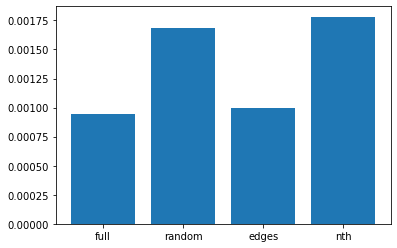

In [51]:
plot_average(degrees)

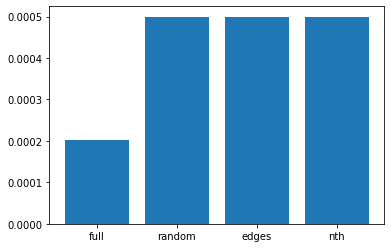

In [60]:
plot_average(between)